# House Price Prediction Project

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os

 Load and Inspect the Data

In [25]:


# --- Step 1: Define the path to your folder ---
# The folder containing all your city CSV files.
path = 'city_data' 

# --- Step 2: Get a list of all CSV files in the folder ---
# glob.glob finds all pathnames matching a specified pattern.
all_files = glob.glob(os.path.join(path, "*.csv"))

# --- Step 3: Load each file and store it in a list ---
list_of_dfs = []
for filename in all_files:
    # Read the individual CSV file
    city_df = pd.read_csv(filename)
    
    # Get the city name from the filename (e.g., 'Delhi.csv' -> 'Delhi')
    city_name = os.path.basename(filename).split('.')[0]
    
    # Add a new column to identify the city for each row
    city_df['city'] = city_name
    
    list_of_dfs.append(city_df)

# --- Step 4: Combine all the DataFrames into one ---
# pd.concat merges all the individual city DataFrames.
df = pd.concat(list_of_dfs, ignore_index=True)

# --- Step 5: Display the combined data ---
print("✅ All city CSV files have been loaded and combined.")

# Display the first 5 rows of the final DataFrame
print("\nCombined Dataset Preview:")
display(df.head())



✅ All city CSV files have been loaded and combined.

Combined Dataset Preview:


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,city
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore


In [13]:
# Get a summary of the combined data
print("\nCombined Dataset Info:")
df.info()


Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 no

Analyze the Target Variable (Price)

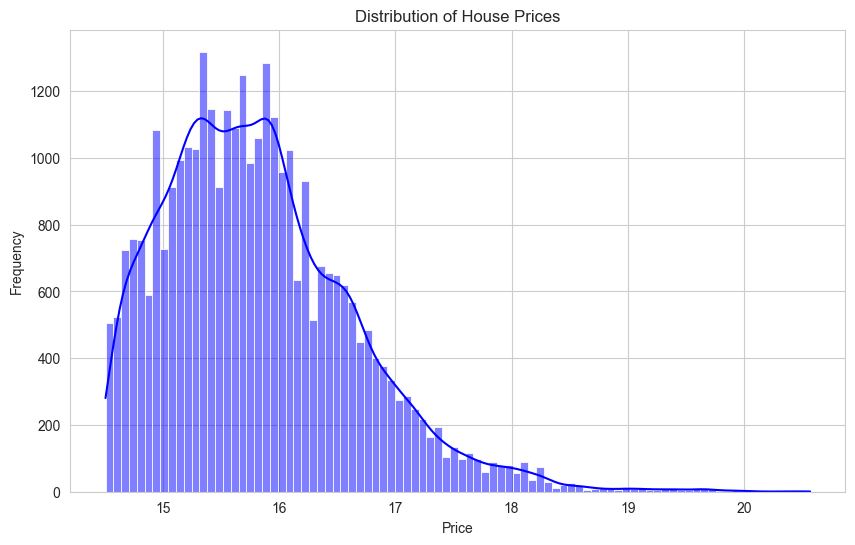

In [10]:
# --- Analyze the Price Column ---

# IMPORTANT: Change 'Price' to the name of the price column in your CSV files.
TARGET_COLUMN = 'Price' 

# Set the plot style
sns.set_style("whitegrid")

# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df[TARGET_COLUMN], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# The distribution is likely skewed to the right. 
# Applying a log transformation can make it more symmetrical, which often helps models perform better.
df[TARGET_COLUMN] = np.log1p(df[TARGET_COLUMN])



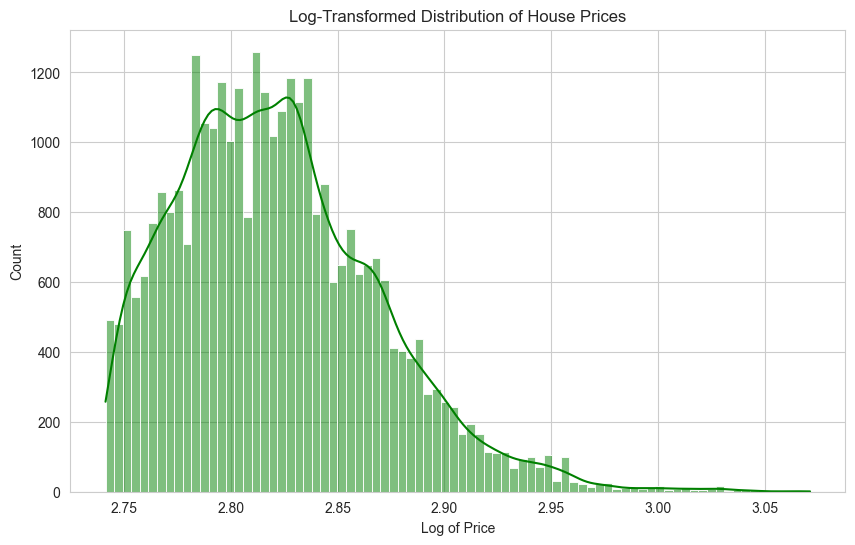

In [11]:
# Plot the log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[TARGET_COLUMN], kde=True, color='green')
plt.title('Log-Transformed Distribution of House Prices')
plt.xlabel('Log of Price')
plt.show()

the Most Important Numerical Features

In [14]:
# --- Find Correlations with the Price ---

# Calculate the correlation matrix for numerical columns only
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()



<Figure size 1200x1000 with 0 Axes>

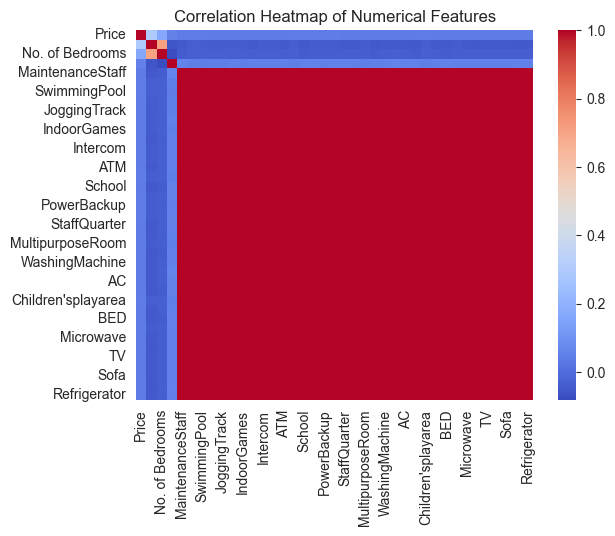

In [15]:
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



In [16]:

# To see the top correlations with price more clearly:
print("\nTop 10 features most correlated with price:")
print(correlation_matrix[TARGET_COLUMN].abs().sort_values(ascending=False).head(10))


Top 10 features most correlated with price:
Price                 1.000000
Area                  0.295062
No. of Bedrooms       0.163689
Resale                0.057410
ClubHouse             0.041541
SwimmingPool          0.041525
Children'splayarea    0.041518
PowerBackup           0.041507
24X7Security          0.041381
CarParking            0.041293
Name: Price, dtype: float64


In [18]:
print(df.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'city'],
      dtype='object')


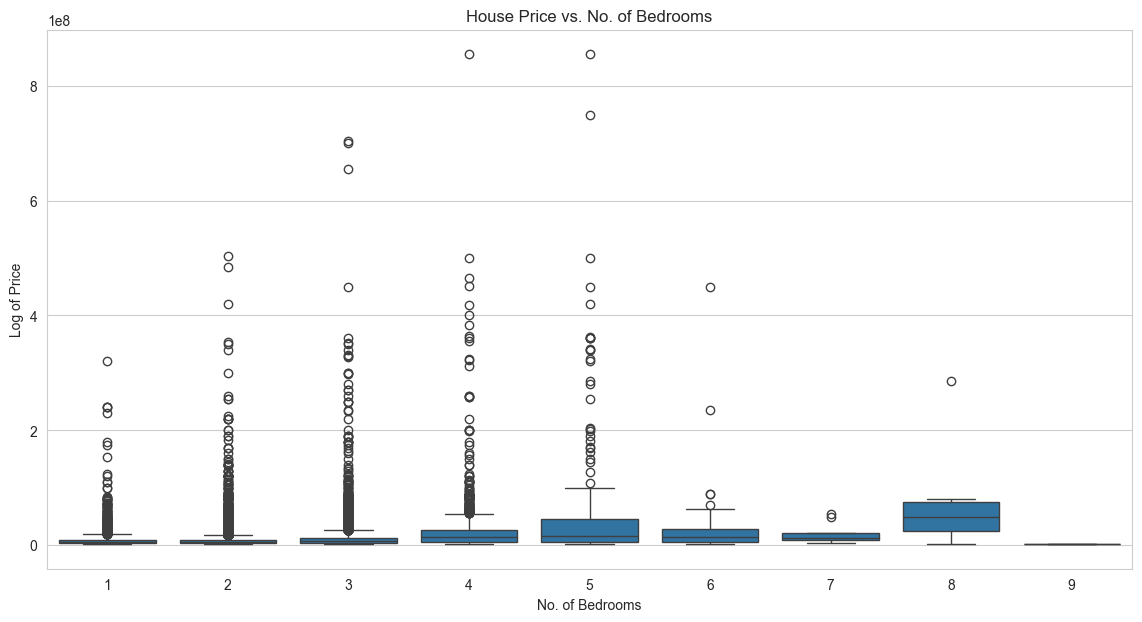

In [23]:
# Use the correct column name from your dataset
FEATURE_TO_ANALYZE = 'No. of Bedrooms' 

# This code will now run without error
plt.figure(figsize=(14, 7))
sns.boxplot(x=FEATURE_TO_ANALYZE, y=TARGET_COLUMN, data=df)
plt.title(f'House Price vs. {FEATURE_TO_ANALYZE}')
plt.xlabel(FEATURE_TO_ANALYZE)
plt.ylabel('Log of Price')
plt.show()

In [22]:
# --- DEBUGGING CELL ---

# 1. Print all the available column names
print("--- AVAILABLE COLUMNS ---")
print(df.columns)
print("-" * 25)

# 2. Define the column you want to analyze
# Change the name inside the quotes to your desired column
FEATURE_TO_ANALYZE = 'Bedrooms' 

# 3. Print the column you chose
print(f"I am trying to use the column: '{FEATURE_TO_ANALYZE}'")
print("-" * 25)

# 4. Try to run the plot code
try:
    sns.boxplot(x=FEATURE_TO_ANALYZE, y=TARGET_COLUMN, data=df)
    plt.title(f'House Price vs. {FEATURE_TO_ANALYZE}')
    plt.show()
    print("Plot generated successfully!")
except ValueError as e:
    print(f"ERROR: {e}")

--- AVAILABLE COLUMNS ---
Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'city'],
      dtype='object')
-------------------------
I am trying to use the column: 'Bedrooms'
-------------------------
ERROR: Could not interpret value `Bedrooms` for `x`. An entry with this name does not appear in `data`.


Handle Missing Values

In [26]:
# Check for missing values in each column
print("Missing values before cleaning:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Strategy: Fill missing numerical columns with the median
# The median is less sensitive to outliers than the mean.
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Strategy: Fill missing categorical columns with the mode (most frequent value)
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())

Missing values before cleaning:
Price                0
Area                 0
Location             0
No. of Bedrooms      0
Resale               0
MaintenanceStaff     0
Gymnasium            0
SwimmingPool         0
LandscapedGardens    0
JoggingTrack         0
dtype: int64

Missing values after cleaning:
0


Encode Categorical Variables

In [27]:
# Convert categorical variables into dummy/indicator variables
# This creates new columns for each category (e.g., city_Delhi, city_Mumbai)
df_processed = pd.get_dummies(df, drop_first=True)

print("\nShape of the data after encoding:")
print(df_processed.shape)

print("\nExample of new encoded columns:")
display(df_processed.head())


Shape of the data after encoding:
(32963, 1819)

Example of new encoded columns:


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Location_vile parle west,Location_vrindavan society,Location_west venkatapuram,Location_worli sea Fase,Location_worli sea face,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,30000000,3340,4,0,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,7888000,1045,2,0,0,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,4866000,1179,2,0,0,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
3,8358000,1675,3,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,6845000,1670,3,0,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False


eparate Features and Target Variable

In [28]:
# Define features (X) and target (y)
# X contains all columns except our target (the log of price)
X = df_processed.drop(TARGET_COLUMN, axis=1)

# y is just the target column
y = df_processed[TARGET_COLUMN]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (32963, 1818)
Target shape: (32963,)


Model Training and Evaluation

In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 26370 samples
Testing set size: 6593 samples


In [30]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define the models
models = {
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Train and evaluate each model
print("\n--- Model Evaluation ---")
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"  R-squared (R²): {r2:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")


--- Model Evaluation ---

Model: Ridge Regression
  R-squared (R²): 0.1755
  Mean Absolute Error (MAE): 7240842.9425

Model: Random Forest
  R-squared (R²): 0.1921
  Mean Absolute Error (MAE): 6444078.1453

Model: XGBoost
  R-squared (R²): 0.1702
  Mean Absolute Error (MAE): 6837359.0000


In [31]:
import pickle

# This assumes your best model is the XGBoost one in the 'models' dictionary
final_model = models['XGBoost']

# Save the trained model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# Also, save the columns the model was trained on
model_columns = X.columns
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)

print("✅ Model and columns saved successfully!")

✅ Model and columns saved successfully!
